# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Audi Ilham Atmaja
- Email: audiatmaja@gmail.com
- ID Dicoding: bigbosscs

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana demografi peminjaman sepeeda dalam 2 tahun terakhir ini
- Pertanyaan 2 : Apakah perubahan cuaca mempengaruhi jumlah peminjaman sepeda ?
- Pertanyaan 3 : Apakah perubahan musim mempengaruhi jumlah peminjaman sepeda dan mana musim dengan peminjam terbanyak dan terendah?

## Import Semua Packages/Library yang Digunakan

In [415]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [416]:
#Ubah file path pada coding berikut sesuai dengan path dimana anda menyimpan database dari bike sharing
day_df = pd.read_csv("https://raw.githubusercontent.com/ailhama/proyekanalisisdata/main/data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/ailhama/proyekanalisisdata/main/data/hour.csv")

In [417]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [418]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Penjelasan Setiap kolom pada dataset

instant: Nomor ID unik untuk setiap baris entri.

dteday: Tanggal entri tersebut.

season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).

yr: Tahun (0: 2011, 1: 2012).

mnth: Bulan (1 hingga 12).

holiday: Indikator apakah itu hari libur atau bukan (0: tidak libur, 1: libur).

weekday: Hari dalam seminggu (0 hingga 6).

workingday: Indikator apakah itu hari kerja atau bukan (0: bukan hari kerja, 1: hari kerja).

weathersit: Kondisi cuaca (1: cerah, 2: berkabut/kabut, 3: hujan ringan/hujan salju ringan, 4: hujan lebat/salju lebat).

temp: Suhu dalam skala normalisasi.

atemp: Suhu terasa (dalam skala normalisasi).

hum: Kelembaban dalam skala normalisasi.

windspeed: Kecepatan angin dalam skala normalisasi.

casual: Jumlah penyewa kasual.

registered: Jumlah penyewa yang terdaftar.

cnt: Total jumlah penyewa (casual + registered).

### Assessing Data

#### Menilai tabel `day_df`

In [419]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [420]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [421]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [422]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [423]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [424]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [425]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [426]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [427]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [428]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [429]:
day_per_hour = hour_df.groupby(by="dteday").agg({'hr':'count'}).reset_index()
day_per_hour[day_per_hour['hr']<24].sort_values('hr')

,dteday,hr
667,2012-10-29,1
26,2011-01-27,8
668,2012-10-30,11
17,2011-01-18,12
25,2011-01-26,16
...,...,...
723,2012-12-24,23
69,2011-03-11,23
71,2011-03-13,23
34,2011-02-04,23


Dari hasil diatas ditemukan kesalahan tipe data pada kolom dteday yang memiliki tipe data object yang seharusnya memiliki tipe data datetime

tidak ditemukan missing value dan data duplikat

### Cleaning Data

Memperbaiki tipe data

In [430]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [431]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [432]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [433]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Menghapus kolom yang tidak perlu

In [434]:
day_df.drop('instant', axis=1, inplace=True)
hour_df.drop('instant', axis=1, inplace=True)

In [435]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [436]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['mnth'] = day_df['mnth'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
})

hour_df['mnth'] = hour_df['mnth'].map({
    1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'
})

day_df['yr'] = day_df['yr'].map({
    0: 2011, 1: 2012
})
hour_df['yr'] = hour_df['yr'].map({
    0: 2011, 1: 2012
})

day_df['season'] = day_df['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cerah',
    2: 'berkabut/kabut',
    3: 'hujan ringan/hujan salju ringan',
    4: 'hujan lebat/salju lebatsit'
})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Cerah',
    2: 'berkabut/kabut',
    3: 'hujan ringan/hujan salju ringan',
    4: 'hujan lebat/salju lebat'
})


In [437]:
day_df.to_csv("day2.csv", index=False)
hour_df.to_csv("hour2.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [438]:
day_df.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
568,2012-07-22,Gugur,2012,July,0,Sun,0,berkabut/kabut,0.667500,0.623125,0.762500,0.093921,2544,4866,7410
579,2012-08-02,Gugur,2012,August,0,Thu,1,Cerah,0.752500,0.707088,0.659583,0.129354,983,6278,7261
471,2012-04-16,Panas,2012,April,1,Mon,0,Cerah,0.664167,0.614925,0.561667,0.284829,1198,5172,6370
285,2011-10-13,Dingin,2011,October,0,Thu,1,berkabut/kabut,0.589167,0.551804,0.896667,0.141787,290,2623,2913
287,2011-10-15,Dingin,2011,October,0,Sat,0,Cerah,0.506667,0.498725,0.483333,0.258083,1899,3318,5217


In [439]:
day_df.describe(include="all")

<ipython-input-439-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Gugur,2012.0,January,0.0,Sun,1.0,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [440]:
day_df.groupby(by=["yr","mnth"]).agg({
    "cnt": "sum"
}).reset_index()

,yr,mnth,cnt
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821
5,2011,June,143512
6,2011,July,141341
7,2011,August,136691
8,2011,September,127418
9,2011,October,123511


In [441]:
day_df.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

In [442]:
day_df.groupby('yr')[['registered', 'casual','cnt']].sum()

,registered,casual,cnt
yr,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


Berdasarkan Cuaca

In [443]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                                  max  min         mean      sum
weathersit                                                      
Cerah                            8714  431  4876.786177  2257952
berkabut/kabut                   8362  605  4035.862348   996858
hujan ringan/hujan salju ringan  4639   22  1803.285714    37869

Berdasarkan Musim

In [444]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Semi     334.928177  2269.204420  7836   431  2604.132597
Panas   1106.097826  3886.233696  8362   795  4992.331522
Gugur   1202.611702  4441.691489  8714  1115  5644.303191
Dingin   729.112360  3999.050562  8555    22  4728.162921

### Explore `hour_df`

In [445]:
hour_df.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5513,2011-08-22,Gugur,2011,August,15,0,Mon,1,Cerah,0.74,0.6515,0.30,0.2985,72,127,199
13015,2012-07-01,Gugur,2012,July,12,0,Sun,0,Cerah,0.90,0.8182,0.37,0.2239,114,319,433
8226,2011-12-14,Dingin,2011,December,10,0,Wed,1,berkabut/kabut,0.32,0.3485,0.57,0.0000,9,133,142
2396,2011-04-14,Panas,2011,April,18,0,Thu,1,Cerah,0.56,0.5303,0.30,0.0000,47,290,337
2283,2011-04-10,Panas,2011,April,0,0,Sun,0,berkabut/kabut,0.38,0.3939,0.87,0.0896,5,48,53


In [446]:
hour_df.groupby(by=["yr","mnth"]).agg({
    "cnt": "sum"
}).reset_index()

,yr,mnth,cnt
0,2011,January,38189
1,2011,February,48215
2,2011,March,64045
3,2011,April,94870
4,2011,May,135821
5,2011,June,143512
6,2011,July,141341
7,2011,August,136691
8,2011,September,127418
9,2011,October,123511


Peminjaman per jam

In [447]:
hourly_data.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi peminjaman sepeeda dalam 2 tahun terakhir ini

In [448]:
peminjam_bulanan_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

peminjam_bulanan_df.head(3)

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


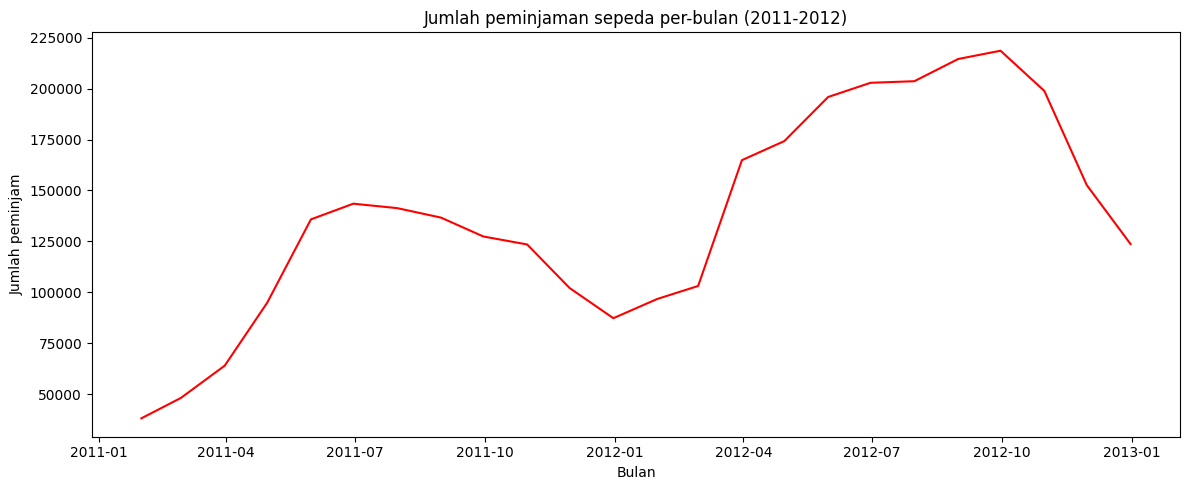

In [449]:
plt.figure(figsize=(12,5))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=peminjam_bulanan_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Bulan")
plt.ylabel("Jumlah peminjam")
plt.title("Jumlah peminjaman sepeda per-bulan (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

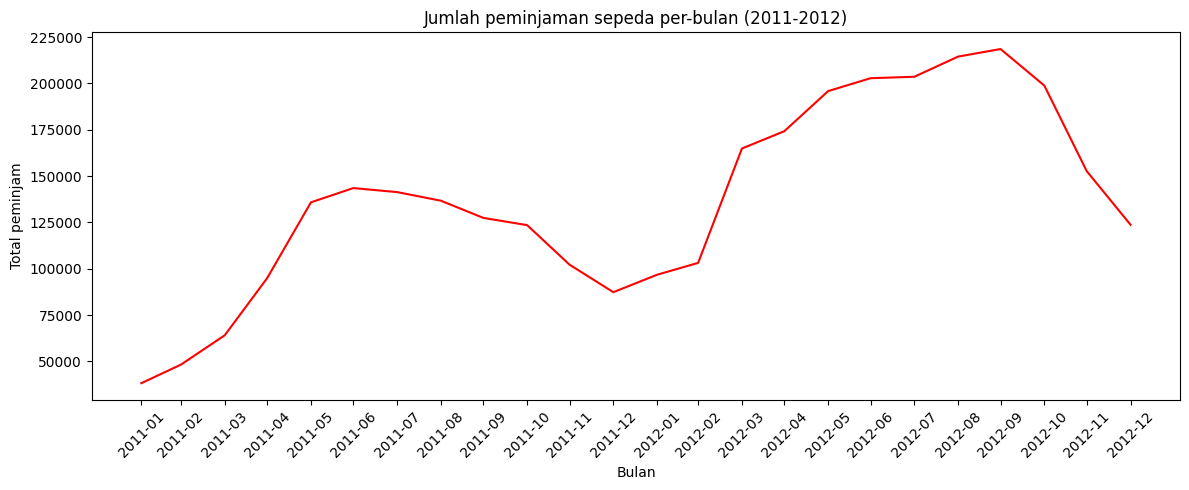

In [450]:
plt.figure(figsize=(12,5))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=peminjam_bulanan_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Bulan")
plt.ylabel("Total peminjam")
plt.title("Jumlah peminjaman sepeda per-bulan (2011-2012)")

# Get month and year from the 'dteday' column
months = peminjam_bulanan_df.index.month
years = peminjam_bulanan_df.index.year

# Set x-axis label to display month and year
plt.xticks(ticks=peminjam_bulanan_df.index, labels=[f"{y}-{m:02d}" for y, m in zip(years, months)], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-451-f70cc9925bc9>:6: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.barplot(x="mnth", y="cnt", hue="yr", data=monthly_counts, palette=custom_palette)


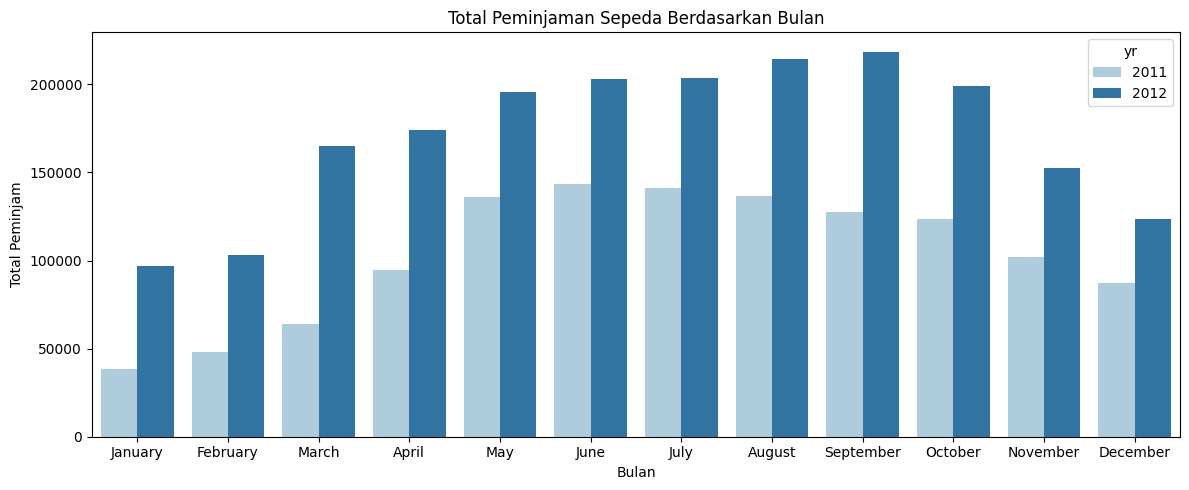

In [451]:
monthly_counts = day_df.groupby(by=["yr", "mnth"]).agg({"cnt": "sum"}).reset_index()
custom_palette = sns.color_palette("Paired")

# Create a line plot using Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x="mnth", y="cnt", hue="yr", data=monthly_counts, palette=custom_palette)

# Set labels and title
plt.xlabel("Bulan")
plt.ylabel("Total Peminjam")
plt.title("Total Peminjaman Sepeda Berdasarkan Bulan")

# Show the plot
plt.tight_layout()
plt.show()

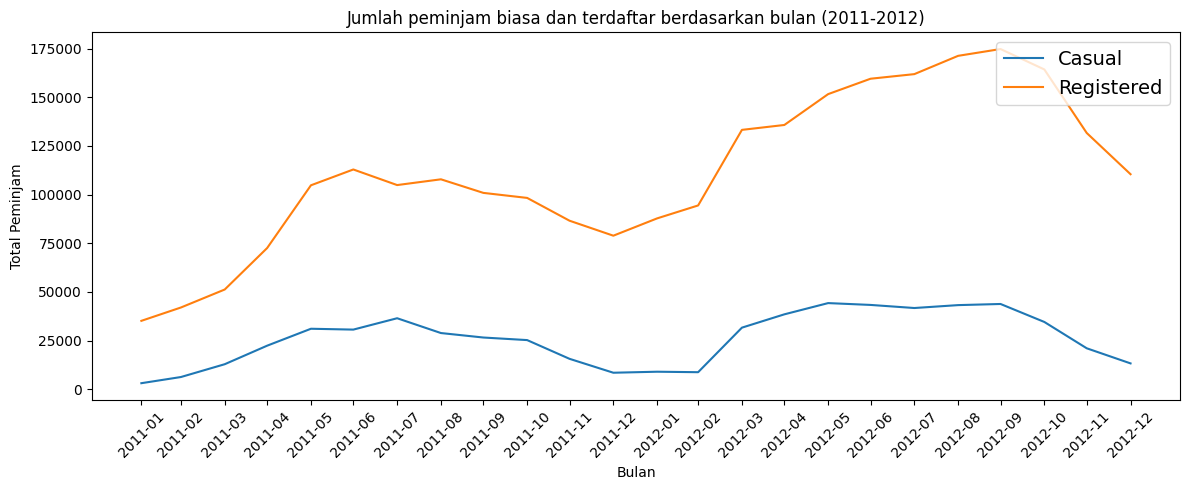

In [452]:
plt.figure(figsize=(12,5))
sns.lineplot(x="dteday", y="casual", data=peminjam_bulanan_df, label='Casual')
sns.lineplot(x="dteday", y="registered", data=peminjam_bulanan_df, label='Registered')

plt.xlabel("Bulan")
plt.ylabel("Total Peminjam")
plt.title("Jumlah peminjam biasa dan terdaftar berdasarkan bulan (2011-2012)")

plt.legend(loc='upper right', fontsize=14)

# Get month and year from the 'dteday' column
months = peminjam_bulanan_df.index.month
years = peminjam_bulanan_df.index.year

# Set x-axis label to display month and year
plt.xticks(ticks=peminjam_bulanan_df.index, labels=[f"{y}-{m:02d}" for y, m in zip(years, months)], rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah perubahan cuaca mempengaruhi jumlah peminjaman sepeda ?

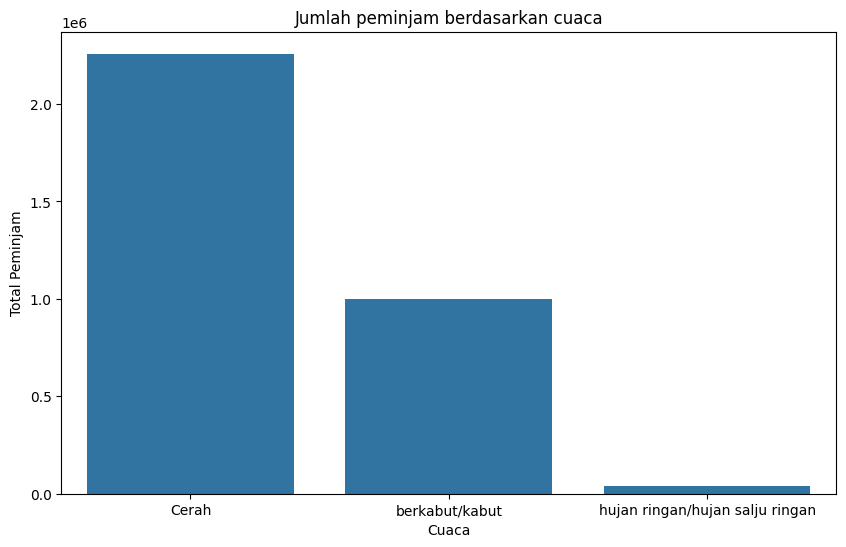

In [453]:
weatherly_users_df = day_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df)

plt.xlabel("Cuaca")
plt.ylabel("Total Peminjam")
plt.title("Jumlah peminjam berdasarkan cuaca")

plt.show()

### Pertanyaan 3: Apakah perubahan musim mempengaruhi jumlah peminjaman sepeda dan mana musim dengan peminjam terbanyak dan terendah?

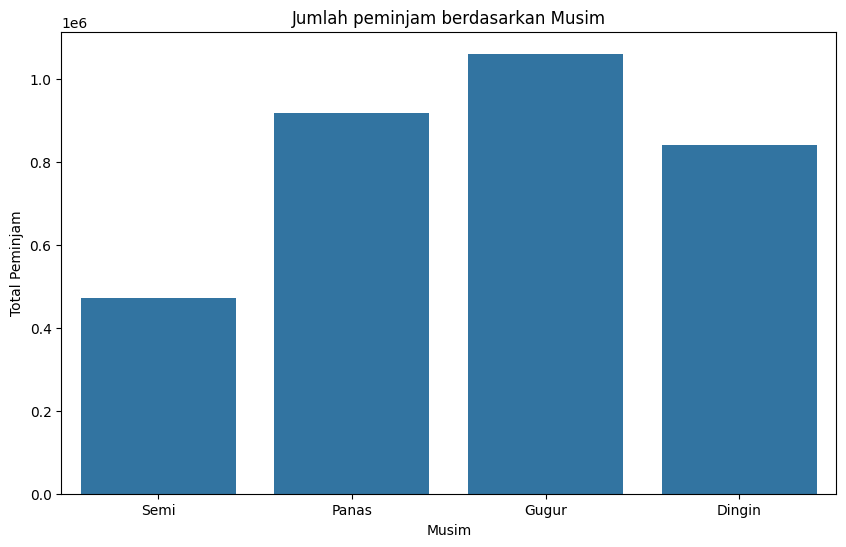

In [454]:
season_users_df = day_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="cnt", data=season_users_df)

plt.xlabel("Musim")
plt.ylabel("Total Peminjam")
plt.title("Jumlah peminjam berdasarkan Musim")

plt.show()

In [455]:
season_pivot_df = season_users_df.groupby('season')[['casual', 'registered']].sum().reset_index()

season_unpivoted_df = season_pivot_df.melt(
    id_vars='season',
    var_name='jenis_peminjam',
    value_name='user_count'
)
season_unpivoted_df

,season,jenis_peminjam,user_count
0,Semi,casual,60622
1,Panas,casual,203522
2,Gugur,casual,226091
3,Dingin,casual,129782
4,Semi,registered,410726
5,Panas,registered,715067
6,Gugur,registered,835038
7,Dingin,registered,711831


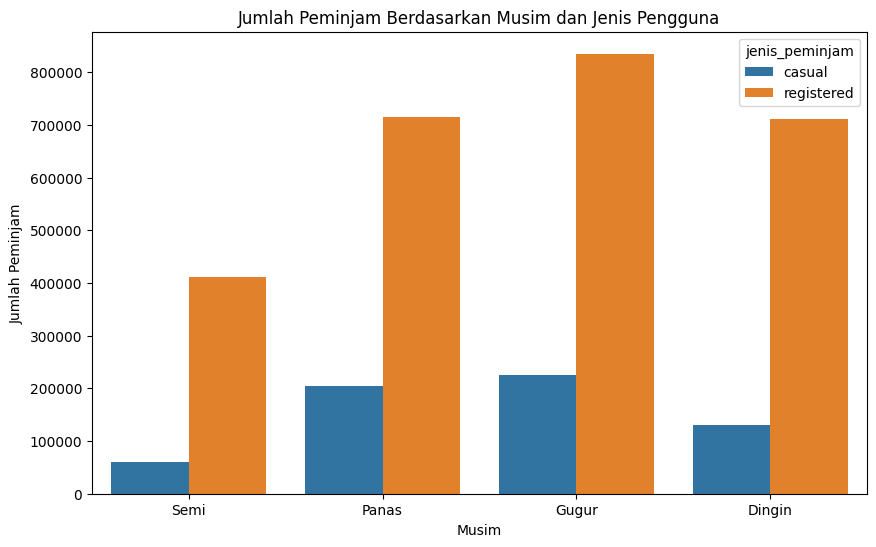

In [456]:
plt.figure(figsize=(10, 6))

sns.barplot(x='season', y='user_count', data=season_unpivoted_df, hue='jenis_peminjam')

plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjam")
plt.title("Jumlah Peminjam Berdasarkan Musim dan Jenis Pengguna")

plt.show()


## Conclusion

Conclution pertanyaan 1

- Jumlah peminjam sepeda cenderung meningkat setiap tahun dengan tren yang relatif sama pada tiap tahunnya dan tren menunjukkan bahwa terjadi penurunan pada pertengahan dan menjelang akhir tahun.

Conclution pertanyaan 2
- Ya jumlah peminjam sepeda jauh lebih tinggi saat cuaca cerah dibandingkan saat kondisi cuaca lebih ekstrem.
perubahan cuaca sangat mempengaruhi jumlah peminjam sepeda terbukti tinggi pada saat cuaca cerah dibandingkan saat cuaca hujan.

Conclution pertanyaan 3
- Ya jperubahan musim mempengaruhi jumlah peminjam sepeda dimana data menunjukkan bahwa jumlah peminjam sepeda tertinggi terjadi pada musim gugur dan terendah pada musim semi.